In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [2]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Correlation_bw_triplets
imp.reload( Correlation_bw_triplets)
from  Correlation_bw_triplets import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

# Load & Prepare Questionnaire Data

## STAI

### STAI Day 1

In [3]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
STAI1_df = xl.parse('STAI', header = 3, usecols = list(range(28))) #change the number when vp added AC
STAI1_df.columns = STAI1_df.columns.str.replace(' ','')
#only get calculated scores
STAI1_df = STAI1_df.iloc[43:49] 
#transpose so vps are row names
STAI1_df = STAI1_df.transpose()
#drop superfluous rows and make header
STAI1_df = STAI1_df.drop(STAI1_df.index[1])
STAI1_df.columns = STAI1_df.iloc[0]
STAI1_df = STAI1_df.drop(STAI1_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
STAI1_df.reset_index(inplace=True)
STAI1_df.reset_index(inplace=True)
STAI1_df = STAI1_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_1', 'Positive affect': 'PositiveAffect_1', 'Trait anxiety': 'TraitAnxiety_1', 'Trait anxiety sub': 'TraitAnxietySub_1', 'Trait depression sub': 'TraitDepressionSub_1'})
STAI1_df.head()


Question,level_0,MID,StateAnxiety_1,PositiveAffect_1,TraitAnxiety_1,TraitAnxietySub_1,TraitDepressionSub_1
0,0,vp06,21,19,22,8,14
1,1,vp07,30,16,32,11,21
2,2,vp10,47,11,43,14,29
3,3,vp11,28,18,32,9,23
4,4,vp12,49,12,44,14,30


### STAI Day 2

In [4]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
STAI2_df = xl.parse('STAI2', header = 3, usecols = list(range(33))) #change the number when vp added
STAI2_df.columns = STAI2_df.columns.str.replace(' ','')
#only get calculated scores
STAI2_df = STAI2_df.iloc[43:49]
#transpose so vps are row names
STAI2_df = STAI2_df.transpose()
#drop superfluous rows and make header
STAI2_df = STAI2_df.drop(STAI2_df.index[1])
STAI2_df.columns = STAI2_df.iloc[0]
STAI2_df = STAI2_df.drop(STAI2_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
STAI2_df.reset_index(inplace=True)
STAI2_df.reset_index(inplace=True)
STAI2_df = STAI2_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_2', 'Positive affect': 'PositiveAffect_2', 'Trait anxiety': 'TraitAnxiety_2', 'Trait anxiety sub': 'TraitAnxietySub_2', 'Trait depression sub': 'TraitDepressionSub_2'})
STAI2_df.head()

Question,level_0,MID,StateAnxiety_2,PositiveAffect_2,TraitAnxiety_2,TraitAnxietySub_2,TraitDepressionSub_2
0,0,vp06,28,17,29,7,22
1,1,vp07,31,15,28,8,20
2,2,vp10,39,16,43,14,29
3,3,vp11,26,18,27,7,20
4,4,vp12,31,19,42,14,28


### STAI Day 3

In [5]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
STAI3_df = xl.parse('STAI3', header = 3, usecols = list(range(8))) #change the number when vp added
STAI3_df.columns = STAI3_df.columns.str.replace(' ','')
#only get calculated scores
STAI3_df = STAI3_df.iloc[43:49]
#transpose so vps are row names
STAI3_df = STAI3_df.transpose()
#drop superfluous rows and make header
STAI3_df = STAI3_df.drop(STAI3_df.index[1])
STAI3_df.columns = STAI3_df.iloc[0]
STAI3_df = STAI3_df.drop(STAI3_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
STAI3_df.reset_index(inplace=True)
STAI3_df.reset_index(inplace=True)
STAI3_df = STAI3_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_3', 'Positive affect': 'PositiveAffect_3', 'Trait anxiety': 'TraitAnxiety_3', 'Trait anxiety sub': 'TraitAnxietySub_3', 'Trait depression sub': 'TraitDepressionSub_3'})
STAI3_df.head()

Question,level_0,MID,StateAnxiety_3,PositiveAffect_3,TraitAnxiety_3,TraitAnxietySub_3,TraitDepressionSub_3
0,0,vp16,29,20,29,9,20
1,1,vp23,42,13,41,13,28
2,2,vp25,44,9,36,9,27
3,3,vp26,19,20,22,7,15
4,4,vp27,20,20,26,9,17


### STAI Dataframe and Correlations (Sanity Check)

In [6]:
STAI_df = STAI1_df.merge(STAI2_df, 'left')
STAI_df = STAI_df.merge(STAI3_df, 'left', on='MID')
STAI_df['StateAnxiety'] = STAI_df[['StateAnxiety_1', 'StateAnxiety_2', 'StateAnxiety_3']].mean(axis=1)
STAI_df['PositiveAffect'] = STAI_df[['PositiveAffect_1', 'PositiveAffect_2', 'PositiveAffect_3']].mean(axis=1)
STAI_df['TraitAnxiety'] = STAI_df[['TraitAnxiety_1', 'TraitAnxiety_2', 'TraitAnxiety_3']].mean(axis=1)
STAI_df['TraitAnxietySub'] = STAI_df[['TraitAnxietySub_1', 'TraitAnxietySub_2', 'TraitAnxietySub_3']].mean(axis=1)
STAI_df['TraitDepressionSub'] = STAI_df[['TraitDepressionSub_1', 'TraitDepressionSub_2', 'TraitDepressionSub_3']].mean(axis=1)

In [20]:
def plotSTAI(triplet_df, title):
    #yerr = triplet_df['se_shock'].as_matrix()
    #xerr = triplet_df['se_gain'].as_matrix()
    fig,axes = plt.subplots(1,2,figsize=(12,4),sharey=True,sharex=True)
    axes[0].scatter(triplet_df['TraitAnxiety_1'],triplet_df['TraitAnxiety_2'])
    #axes[0].errorbar(triplet_df['gain'],triplet_df['shock'], xerr=xerr, yerr=yerr)
    axes[0].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].plot([0, 1], [0, 1], transform=axes[0].transAxes, linewidth = 0.5)
    axes[0].set_xlabel('Trait Anxiety Day 1')
    axes[0].set_ylabel('Trait Anxiety Day 2')
    r,p=spearmanr(triplet_df['TraitAnxiety_1'],triplet_df['TraitAnxiety_2'])
    axes[0].set_title('TraitAnxiety_1/TraitAnxiety_2 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    axes[0].set_xlim([0,80])
    axes[0].set_ylim([0,80])
    #axes[0].set_aspect('equal')

    
    axes[1].scatter(triplet_df['StateAnxiety_1'],triplet_df['StateAnxiety_2'])
    axes[1].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes, linewidth = 0.5)
    axes[1].set_xlabel('StateAnxiety_1')
    axes[1].set_ylabel('StateAnxiety_2')
    r,p=spearmanr(triplet_df['StateAnxiety_1'],triplet_df['StateAnxiety_2'])
    axes[1].set_title('StateAnxiety_1/StateAnxiety_2 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[1].set_aspect('equal')

    #axes[2].scatter(triplet_df['PositiveAffect_1'],triplet_df['PositiveAffect_2'])
    #axes[2].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    #axes[2].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)

    #axes[2].set_xlabel('PositiveAffect_1')
    #axes[2].set_ylabel('PositiveAffect_2')
    #r,p=spearmanr(triplet_df['PositiveAffect_1'],triplet_df['PositiveAffect_2'])
    #axes[2].set_title('PositiveAffect_1/PositiveAffect_2 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[2].set_aspect('equal')
    sns.despine()

    fig.suptitle(title)
    fig.subplots_adjust(top=0.77)

    return(fig)

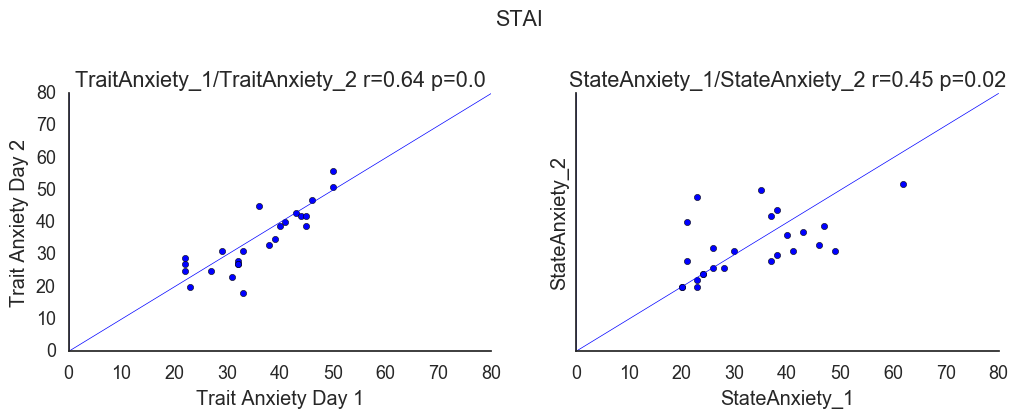

In [21]:
f = plotSTAI(STAI_df, 'STAI')


## BDI

In [ ]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
BDI_df = xl.parse('BDI', header = 3, usecols = list(range(28))) #change the number when vp added
BDI_df.columns = BDI_df.columns.str.replace(' ','')
#only get calculated scores
BDI_df = BDI_df.iloc[23:26]
#transpose so vps are row names
BDI_df = BDI_df.transpose()
#drop superfluous rows and make header
BDI_df = BDI_df.drop(BDI_df.index[1])
BDI_df.columns = BDI_df.iloc[0]
BDI_df = BDI_df.drop(BDI_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
BDI_df.reset_index(inplace=True)
BDI_df.reset_index(inplace=True)
BDI_df = BDI_df.rename(columns={'index': 'MID'})
BDI_df.head()


## MASQ

In [ ]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
MASQ_df = xl.parse('MASQ', header = 3, usecols = list(range(28))) #change the number when vp added
MASQ_df.columns = MASQ_df.columns.str.replace(' ','')
#only get calculated scores
MASQ_df = MASQ_df.iloc[92:97]
#transpose so vps are row names
MASQ_df = MASQ_df.transpose()
#drop superfluous rows and make header
MASQ_df = MASQ_df.drop(MASQ_df.index[1])
MASQ_df.columns = MASQ_df.iloc[0]
MASQ_df = MASQ_df.drop(MASQ_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
MASQ_df.reset_index(inplace=True)
MASQ_df.reset_index(inplace=True)
MASQ_df = MASQ_df.rename(columns={'index': 'MID'})
MASQ_df.head()

## IUS

In [ ]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
IUS_df = xl.parse('IUS', header = 3, usecols = list(range(28))) #change the number when vp added
IUS_df.columns = IUS_df.columns.str.replace(' ','')
IUS_df.head()

In [ ]:
#only get calculated scores
IUS_df = IUS_df.iloc[92:97]
#transpose so vps are row names
IUS_df = IUS_df.transpose()
#drop superfluous rows and make header
IUS_df = IUS_df.drop(IUS_df.index[1])
IUS_df.columns = IUS_df.iloc[0]
IUS_df = IUS_df.drop(IUS_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
IUS_df.reset_index(inplace=True)
IUS_df.reset_index(inplace=True)
IUS_df = IUS_df.rename(columns={'index': 'MID'})
IUS_df.head()

## PSWQ

In [ ]:
#get data
#change directory to data folder
os.chdir("../data/")
cwd = os.getcwd()
#read in data
xl = pd.ExcelFile('Data_Log_and_Questionnaires.xlsx')
PSWQ_df = xl.parse('PSWQ', header = 3, usecols = list(range(28))) #change the number when vp added
PSWQ_df.columns = PSWQ_df.columns.str.replace(' ','')
PSWQ_df.head()

In [ ]:
#only get calculated scores
PSWQ_df = PSWQ_df.iloc[92:97]
#transpose so vps are row names
PSWQ_df = PSWQ_df.transpose()
#drop superfluous rows and make header
PSWQ_df = PSWQ_df.drop(PSWQ_df.index[1])
PSWQ_df.columns = PSWQ_df.iloc[0]
PSWQ_df = PSWQ_df.drop(PSWQ_df.index[0])
#The first call to reset_index moves the columns that were used in group_by() back to columns.  
#The second one adds a new column that will serve as id. 
PSWQ_df.reset_index(inplace=True)
PSWQ_df.reset_index(inplace=True)
PSWQ_df = PSWQ_df.rename(columns={'index': 'MID'})
PSWQ_df.head()

# Load and prepare model param data (triplets)

## model with ambiguous level

In [9]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

In [10]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
#change MIDs to match between gainloss and shock versions
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]


In [11]:
triplet_intercept = triplet_rl(model_param_df, 'intercept_r')
triplet_magdiff = triplet_rl(model_param_df, 'mag_diff_rl')
triplet_probdiff = triplet_rl(model_param_df, 'prob_diff_rl')
triplet_ambiguityLevel = triplet_rl(model_param_df, 'sqrt_prop_revealed_diff_rl')

In [12]:
triplet_intercept_STAI = triplet_intercept.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff.merge(STAI_df, 'left')
triplet_ambiguityLevel_STAI = triplet_ambiguityLevel.merge(STAI_df, 'left')

In [13]:
def plotSTAI(triplet_df, param):
    #yerr = triplet_df['se_shock']
    #xerr = triplet_df['se_gain']
    fig,axes = plt.subplots(1,3, figsize = (12, 4),sharey=True,sharex=True)
    axes[0].scatter(triplet_df['TraitAnxiety'],triplet_df['gain'])
    #axes[0].errorbar(triplet_df['gain'],triplet_df['shock'], xerr=xerr, yerr=yerr)
    axes[0].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].axvline(x=40.000,c="blue",linewidth=0.5,zorder=0)

    axes[0].set_xlabel('Trait Anxiety Score')
    axes[0].set_ylabel('beta')
    #axes[0].set_ylim([-3.5,3.5])
    axes[0].set_xlim([20,60])
    r,p=spearmanr(triplet_df['TraitAnxiety'],triplet_df['gain'])
    axes[0].set_title('TraitAnxiety/gain r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    
    #axes[0].set_aspect('equal')

    axes[1].scatter(triplet_df['TraitAnxiety'],triplet_df['loss'])
    axes[1].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].axvline(x=40.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].set_xlabel('Trait Anxiety Score')
    axes[1].set_ylabel('beta')
    r,p=spearmanr(triplet_df['TraitAnxiety'],triplet_df['loss'])
    axes[1].set_title('TraitAnxiety/loss r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[1].set_aspect('equal')

    axes[2].scatter(triplet_df['TraitAnxiety'],triplet_df['shock'])
    axes[2].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[2].axvline(x=40.000,c="blue",linewidth=0.5,zorder=0)
    axes[2].set_xlabel('Trait Anxiety Score')
    axes[2].set_ylabel('beta')
    r,p=spearmanr(triplet_df['TraitAnxiety'],triplet_df['shock'])
    axes[2].set_title('TraitAnxiety/shock r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[2].set_aspect('equal')
    sns.despine()

    fig.suptitle(param)
    fig.subplots_adjust(top=0.77)
    
    return(fig)

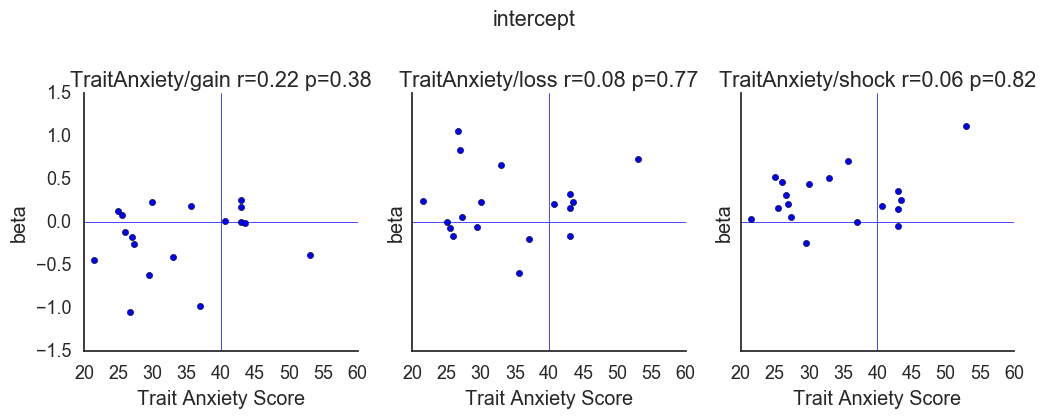

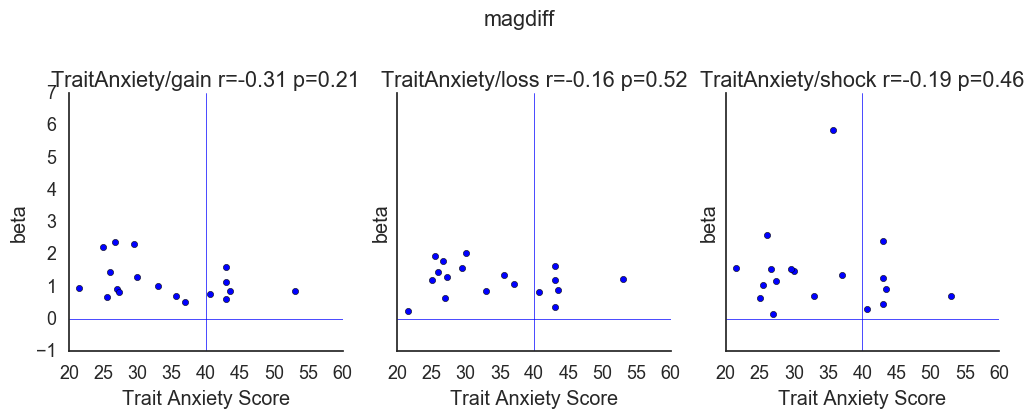

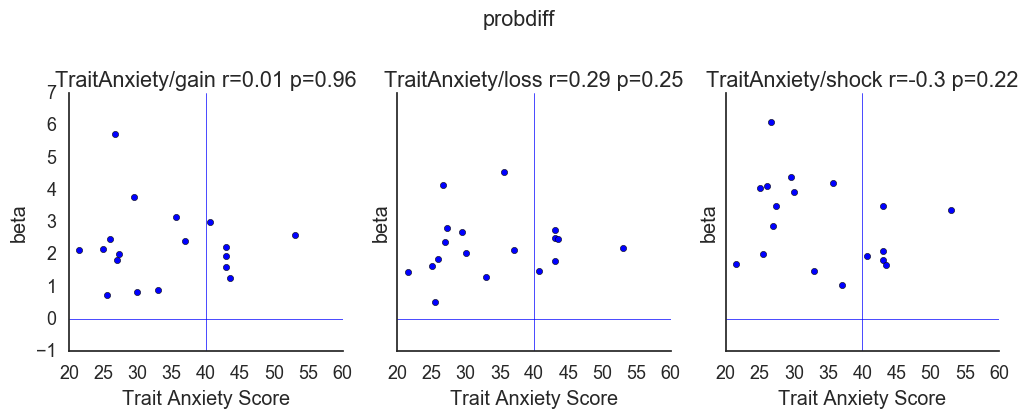

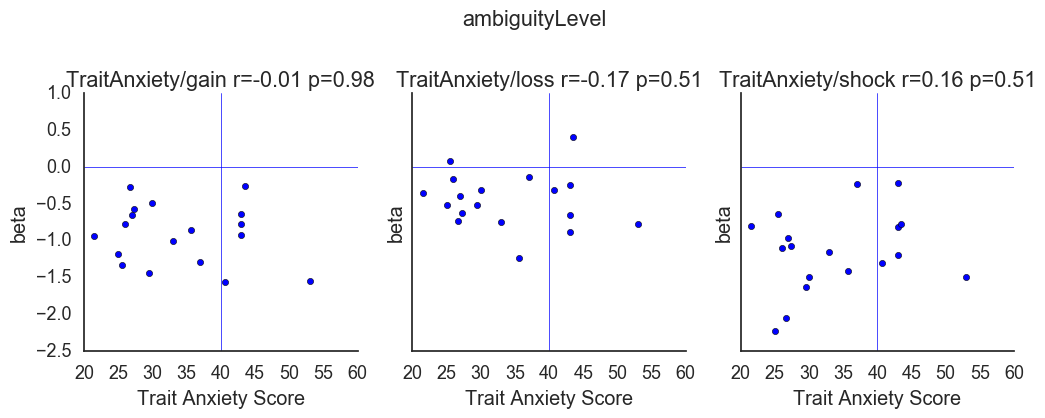

In [15]:
plotSTAI(triplet_intercept_STAI, 'intercept')
plotSTAI(triplet_magdiff_STAI, 'magdiff')
plotSTAI(triplet_probdiff_STAI, 'probdiff')
f = plotSTAI(triplet_ambiguityLevel_STAI, 'ambiguityLevel')